# TP2: Canny Edges

Read, understand, and complete the following notebook. You must return the completed notebook, including your answers and illustrations (you may need to add cells to write your code or comments). If you cannot/don't want to use notebooks, you can return both your python code and a report in pdf. 

Return your work by e-mail at `gabriel.fiastre@inria.fr` using a single file (ipynb or zip) with the format `LASTNAME_FirstName_TP2.ipynb`

The first part is about basic image processing in Python, the second guides you in the implementation of the Canny edge detector.

## 1. Playing with images in Python

Here are a set of useful libraries for image processing. You will need to refer to the online documentation of the different libraries to complete the TP.

In [21]:
# Numpy is the key library for manipulating arrays. 
# Use the online ressources: https://www.numpy.org/
import numpy as np 

# Matplotlib is the standard library used to show images
# The documentation is here: http://matplotlib.org/api/pyplot_api.html
# You can also check this simple intro to using ipython notebook with images:
# https://matplotlib.org/users/image_tutorial.html
import matplotlib.pyplot as plt 

# By default, the grayscale images are displayed with the jet colormap: use grayscale instead
plt.rcParams['image.cmap'] = 'gray' 

# By default (for matplotlib<3.2), images are rescaled without antialias: enforce it (see question 1.c.)
plt.rcParams['image.interpolation'] = 'hanning'

# One of the several python libraries for image procession
import scipy.ndimage as ndimage

Here is a simple example how to read and display an image.

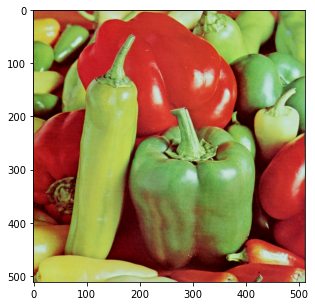

In [22]:
filename = 'legumes.jpg'
I = plt.imread(filename)
# This line is not necessary, but allows you to control the size of the displayed image:
plt.figure(figsize=(5, 5))
plt.imshow(I)
# This line is needed when using several figures, it's also a good practice to use it for readability (explicitly asking to draw the figures created)
plt.show()

**1.a.** What is the type of the image `I`? Its size? 
   What is the type of the values it contains? What is their range? 

In [23]:
######################
# Complete that part #
######################

print("The type of the image is:",type(I))
print("The size of the image is:",I.shape)
print("The type of values it contains is:",I.dtype)
print(f"The range of values it contains is: {np.min(I)} to {np.max(I)}")


# Tips: look for numpy attributes (e.g. https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html) 
# and functions to do what you want (e.g. np.min)

The type of the image is: <class 'numpy.ndarray'>
The size of the image is: (512, 512, 3)
The type of values it contains is: uint8
The range of values it contains is: 0 to 238


Here is a simple function to load an image and crop it according to a bounding box. Make sure you understand every line

In [24]:
def load_image_v0(name:str, crop_window:tuple = None): 
    I = plt.imread(name)
    if crop_window is not None:
        I = I[crop_window[0]:crop_window[1],
              crop_window[2]:crop_window[3]]
    if I.dtype == np.uint8:
        # PNG images are read as 0-1 float
        # JPEG images are read as 0-255 uint8
        # Scale the values of the image between 0 and 1 (instead of 0 255)
        I = I.astype('float') / 255.
    return I

**1.b.** Use the function to display the 100 pixels *wide* and 50 pixels *high* bottom left corner of `legumes.jpg`. 

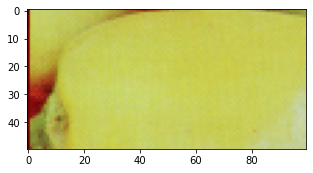

In [25]:
######################
# Complete that part #
######################
filename = 'legumes.jpg'
window = (-50,None,0,100)
I = load_image_v0(filename, window)

# This line is not necessary, but allows you to control the size of the displayed image:
plt.figure(figsize=(5, 5))
plt.imshow(I)
# This line is needed when using several figures
plt.show()

**1.c.** Modify the following code so that `J` is a grid with one *vertical* line every 100 pixels, and one *horizontal* every 20 pixels. What is the difference between the two plots? What is the danger with the `nearest` interpolation?

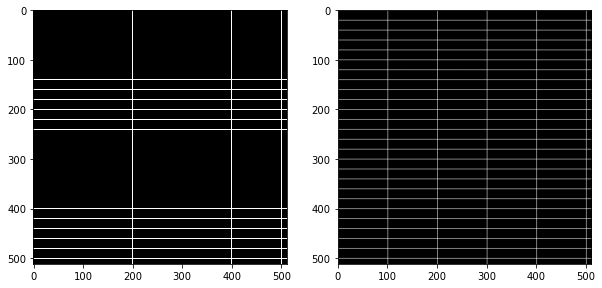

In [26]:
J = np.zeros((512, 512))
J[:,::100] = 1
J[::20,:] = 1 

######################
# Complete that part #
######################


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(J, interpolation="nearest")
plt.subplot(1, 2, 2)
plt.imshow(J, interpolation="hanning")
plt.show()

The "nearest" interpolation stretched the image locally to generate missing pixels, so it looks distorted, while the "hanning" interpolation kept the intended pattern. The reason for it is that it sub-samples data that actually has a higher frequency. Therefore, the "nearest" initerpolation has the danger of creating patterns that don't actually exist in the original image.

In [27]:
# Tips: you can enable matplotlib's notebook interactive mode with the following command
# It allows to zoom in and out the plots easily
%matplotlib notebook

# Having many such plots can be heavy for your computer.
# To revert, use the command
%matplotlib inline

**1.d.** Modify the following function so that it can load an RGB image and convert it to a grayscale image (*i.e.* converting it from a `H×W×3` array to a `H×W` array) using the formula `L = 0.2989 * R + 0.5870 * G + 0.1140 * B`, where `R`, `G` and `B` are the three color channels of the color image and `L` is the luminance (*i.e.* the grayscale image). Include a test so that your function also works if the input image is grayscale.

In [28]:
def load_image(name, crop_window=None):
    I = plt.imread(name)
    ######################
    # Complete that part #
    ######################
    
    if I.shape[2] is not None:
        I = 0.2989 * I[:,:,0] + 0.5870 * I[:,:,1] + 0.1140 * I[:,:,2]
    

    if crop_window is not None:
        I = I[crop_window[0]:crop_window[1],
              crop_window[2]:crop_window[3]]
    I = I.astype('float') / 255.
    
    return I

Use your function to load a grayscale version of `legumes.jpg` and save it as a png image.

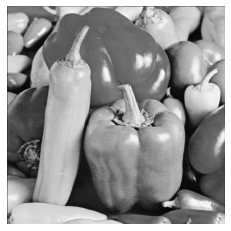

In [29]:
######################
# Complete that part #
######################
filename = 'legumes.jpg'
I = load_image(filename)

# This line is not necessary, but allows you to control the size of the displayed image:
plt.imshow(I)
plt.axis('off')

plt.savefig('legumes.png')
# This line is needed when using several figures
plt.show()

**For the rest of the TP, *use only grayscale images***

**1.e.** Here is an example of how to convolve an image with a Gaussian. What is the size of the output? What are the border conditions? Replace the border conditions with zero padding and comment on the result

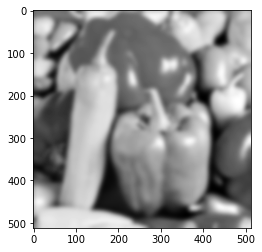

In [30]:
Ib = ndimage.gaussian_filter(I, sigma=5)
plt.imshow(Ib)
plt.show()

In [31]:
print("The size of the image is",Ib.shape)

The size of the image is (512, 512)


The default border condition of ndimage.gaussian_filter is 'reflect' also referred to as half-sample symmetric

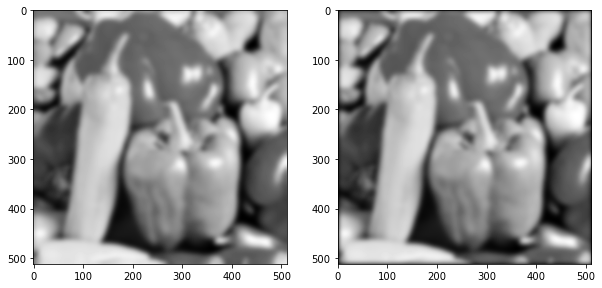

In [32]:
Ib1 = ndimage.gaussian_filter(I, sigma=5)
Ib2 = ndimage.gaussian_filter(I, sigma=5,mode='constant',cval=0)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(Ib1)
plt.subplot(1, 2, 2)
plt.imshow(Ib2)
plt.show()

The resulting image with zero padding presents a noteceable darkeninig of the edge pixels, while the reflected image does not present a clear consequence for the use of this border condition. 

**1.f.** What does the following code do? What is its visual effect on the image?

In [33]:
k = np.array([[-1./9, -1./9, -1./9],
              [-1./9, 17./9, -1./9],
              [-1./9, -1./9, -1./9]])
O = ndimage.convolve(I, k)

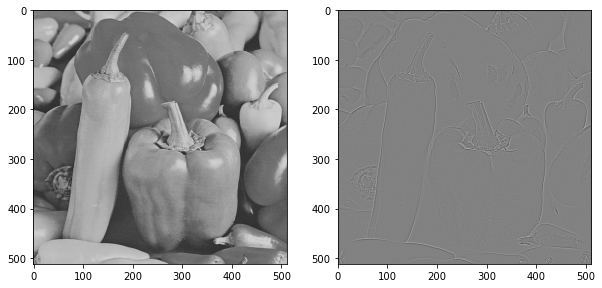

In [34]:
######################
# Complete that part #
######################
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(O)
plt.subplot(1, 2, 2)
plt.imshow(I-O)
plt.show()
# Tip : visualize the convolved image, and the difference between the convolved image and the original one for a deeper understanding 


This code does a convolution between the kernel k and the image I. The result of this transformation is that the contours are more highlighted

**1.g.** Write a function `compute_gradient` that returns three arrays/images: two containing the input image gradients (along each axis), and another with the gradient norm. 
It should take an optional argument `sigma` that gives the smoothing of the derivative (i.e. the standard deviation of the Gaussian kernel used to blur the image before taking the derivative). 

What is the size of the output compared to the size of the input?

The size of the input is (512, 512) and the size of the output is (512, 512)


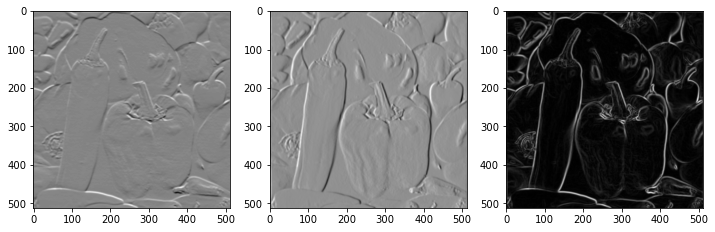

In [35]:
def compute_gradient(I, sigma=0):
    ######################
    # Complete that part #
    ######################
    
    Gx = ndimage.gaussian_filter(I, sigma, order=[1,0])
    Gy = ndimage.gaussian_filter(I, sigma, order=[0,1])
    # Tip : refer to the documentation of ndimage.gaussian_filter for its parameters and their meaning
    Gn = np.sqrt(Gx**2+Gy**2)

    return Gx, Gy, Gn

Gx, Gy, Gn = compute_gradient(I,1.5)

print(f"The size of the input is {I.shape} and the size of the output is {Gx.shape}")
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.imshow(Gx)
plt.subplot(1, 3, 2)
plt.imshow(Gy)
plt.subplot(1, 3, 3)
plt.imshow(Gn)
plt.show()

**1.h.** Visualize the three images returned by your function for different values of sigma.

Sigma value: 0.5


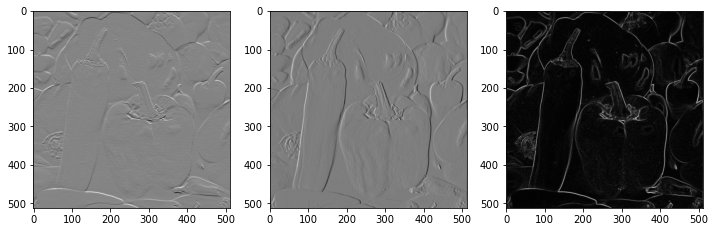

Sigma value: 1.3333333333333335


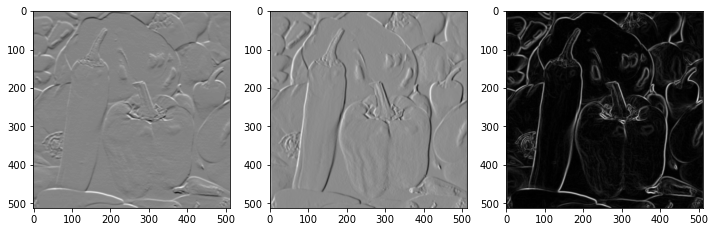

Sigma value: 2.166666666666667


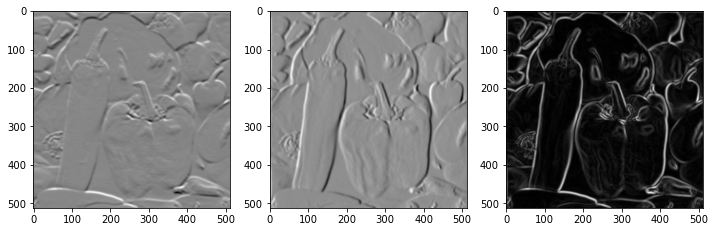

Sigma value: 3.0


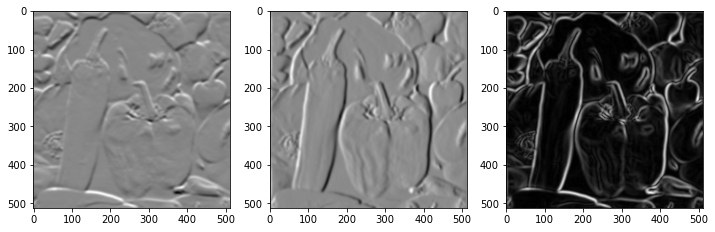

In [36]:
for sigma in np.linspace(0.5,3,num=4):
    print("Sigma value:",sigma)
    Gx, Gy, Gn = compute_gradient(I,sigma)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(Gx)
    plt.subplot(1, 3, 2)
    plt.imshow(Gy)
    plt.subplot(1, 3, 3)
    plt.imshow(Gn)
    plt.show()



If you had difficulties to do this first part, it might be good to look at a few more examples before writting your own code. You can find many python tutorial for image processing online, for example http://www.scipy-lectures.org/advanced/image_processing/

## 2. Canny edges

**2.a.** Write a simple function `threshold(G, threshold)` that threshold the norm of the gradient and outputs a *binary* image. Discuss the parameters (there are two) and their visual influence of the results.

Threshold: 0.02


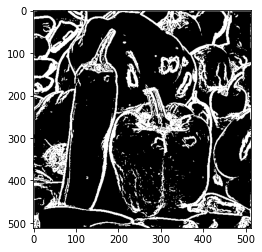

Threshold: 0.0275


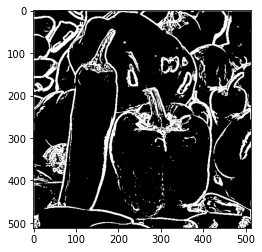

Threshold: 0.035


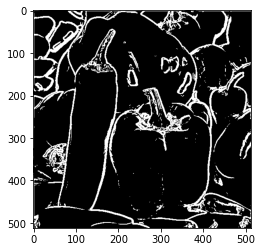

Threshold: 0.0425


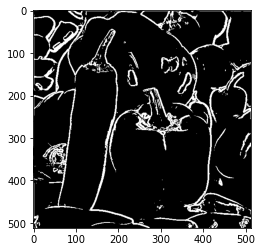

Threshold: 0.05


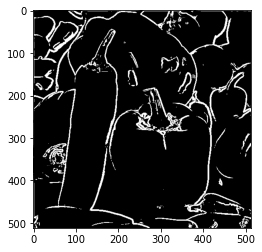

In [37]:
def threshold(G, t):
    G = G >= t
    return G

Gx, Gy, Gn = compute_gradient(I,1)

for t in np.linspace(0.02,0.05,num=5):
    print("Threshold:",t)
    G = threshold(Gn,t )
    plt.imshow(G)
    plt.show()

# plot for differentset of parameters

The sigma parameter makes the edges blurrier and thicker the higher it is. While the threshold parameter eliminates more noise the higher it is, until a point where it starts to eliminate the edges themselves.

**2.b.** Write a function `nms(gradient)` which takes as input the full gradient and outputs a *binary* image with value 1 only for pixels that correspond to a maximum in the direction of the gradient. 

Display the resulting binary image for a given set of parameters, and comment on how question **1.c.** might affect your visual results.

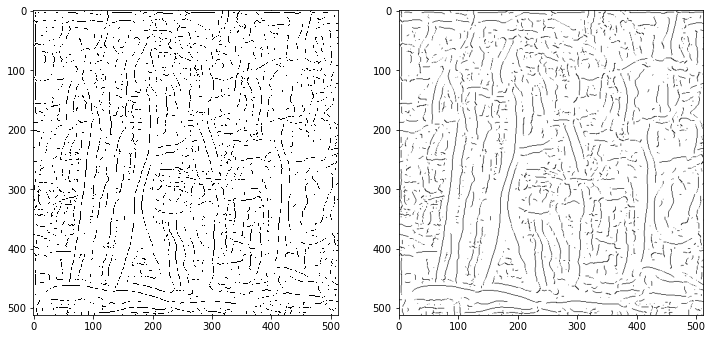

In [38]:
NEIGHBORS = np.array([[1, 0], [1, -1], [0, 1], [1, 1]])
GRAD_DIRS = np.array([[1, 0], [2**-.5, 2**-.5], [0, 1], [-2**-.5, 2**-.5]])

def nms(gradient):
    Gy, Gx, Gn = gradient
    
    h, w = Gy.shape
    
    output = np.zeros(Gx.shape, dtype=bool)
        
    candidates = [[Gy[i,j]*GRAD_DIRS[:,0] + Gx[i,j]*GRAD_DIRS[:,1] for j in range (w)] for i in range(h)]
    # IMPORTANT: np.abs

    max_dir = np.argmax(np.abs(candidates),axis=2)
    
    #extending image to deal with border problems
    last_row = Gn[-1,:]
    Gn = np.vstack((Gn,last_row))
    last_col = Gn[:,-1]
    Gn = np.column_stack((Gn,last_col))
    
    for i in range (h):
        for j in range (w):

            current = Gn[i,j]
            dy, dx = NEIGHBORS[max_dir[i,j],:]

            neighbor_1 = Gn[i+dy,j+dx]
            neighbor_2 = Gn[i-dy,j-dx]
                

            if current > neighbor_1 and current > neighbor_2:
                output[i,j] = 1
    
    return output

result = nms(compute_gradient(I, 4))

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(1-result, interpolation="nearest")
plt.subplot(1, 2, 2)
plt.imshow(1-result, interpolation="hanning")
plt.show()

Using nearest neighbor interpolation may result on the edges becoming pixelated, with gaps between the points.

**2.c.** Use `nms` and `threshold` to extract edges with a gradient norm larger than a given threshold and compare visually.

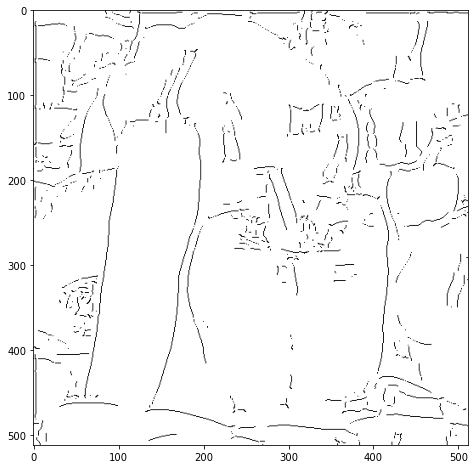

In [39]:
gradient = compute_gradient(I, 3)
mask = threshold(gradient[2], 0.017) 
result = nms(gradient)*mask

plt.figure(figsize=(8, 8))
plt.imshow(1-result, interpolation="hanning")
plt.show()

**2.d.** Implement a function computing the full Canny edges by adding a hysteresis thresholding to this processing.

Here is one way to do the hysteresis thresholding: 
  - Keep a list of the edges for which you have to visit neighbours;
  - Initialize the list with the edges corresponding to the most discriminative threshold;
  - Until the list is empty:
    * Take an edge you are sure of (*i.e.* from the list)
    * Check if its neighbours are considered edges using the less discriminative threshold;
      - If they are, add them to the output edges and in the list of edges to visit.

In [43]:
def hysteresis(Gn_nmsd, t_low, t_high):
    Gn, nmsd = Gn_nmsd
    h, w = Gn.shape
    shape = np.array(Gn.shape)
    output = np.zeros((h+2,w+2), dtype=bool)

    mask_high = threshold(Gn, t_high)
    mask_low = threshold(Gn, t_low) ^ mask_high 
    result_high = nmsd * mask_high
    result_low = nmsd * mask_low

    # Pad the result_high and result_low with a border of zeros
    result_high = np.pad(result_high, pad_width=1, mode='constant', constant_values=0)
    result_low = np.pad(result_low, pad_width=1, mode='constant', constant_values=0)
    
    #create set of strong points
    points_to_visit = set(tuple(point) for point in np.transpose(np.where(result_high)))
    visited_points = set()

    while points_to_visit :

        point = points_to_visit.pop()
        visited_points.add(point)
        output[point] = True

        for neighbor in NEIGHBORS:
            
            candidate_1 = tuple(np.array((point+neighbor)))
            candidate_2 = tuple(np.array((point-neighbor)))

            if result_low[candidate_1] == True and candidate_1 not in visited_points:
                    points_to_visit.add(candidate_1)
            
            if result_low[candidate_2] == True and candidate_2 not in visited_points:
                    points_to_visit.add(candidate_2)    

    output = output[1:-1, 1:-1]       
    
    return output



def canny_edges(I, sigma=2, t_low=0.01, t_high=0.08):
    G = compute_gradient(I, sigma)
    non_max_supression = nms(G)
    result = hysteresis ((G[2],non_max_supression),t_low,t_high)

    return result


**2.e.** Use your algorithm with different parameters and comment on their respective effects.

In [45]:
def test_canny_edges(I, sigma_values, t_low_values, t_high_values):
    for sigma in sigma_values:
        fig, axes = plt.subplots(len(t_low_values), len(t_high_values), figsize=(15, 15))
        fig.suptitle(f'sigma={sigma}', fontsize=16)

        for i, t_low in enumerate(t_low_values):
            for j, t_high in enumerate(t_high_values):
                edge_image = canny_edges(I, sigma, t_low, t_high)
                axes[i, j].imshow(1-edge_image)
                axes[i, j].set_title(f't_low={t_low}, t_high={t_high}')
                axes[i, j].axis('off')

    plt.show()


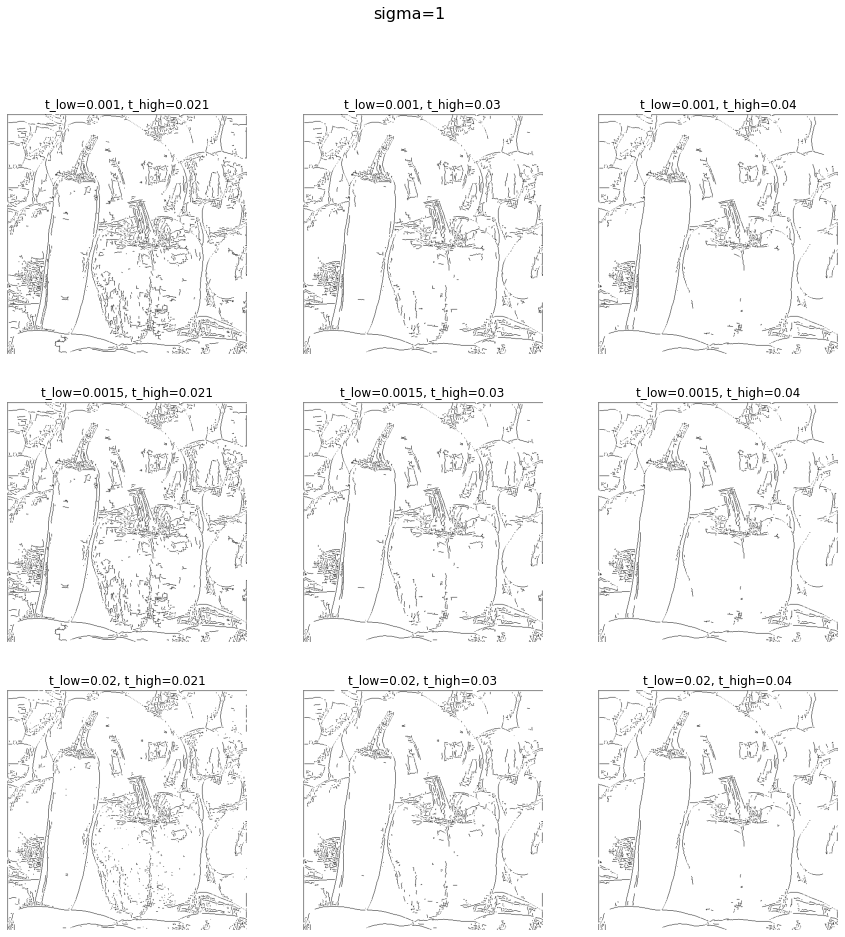

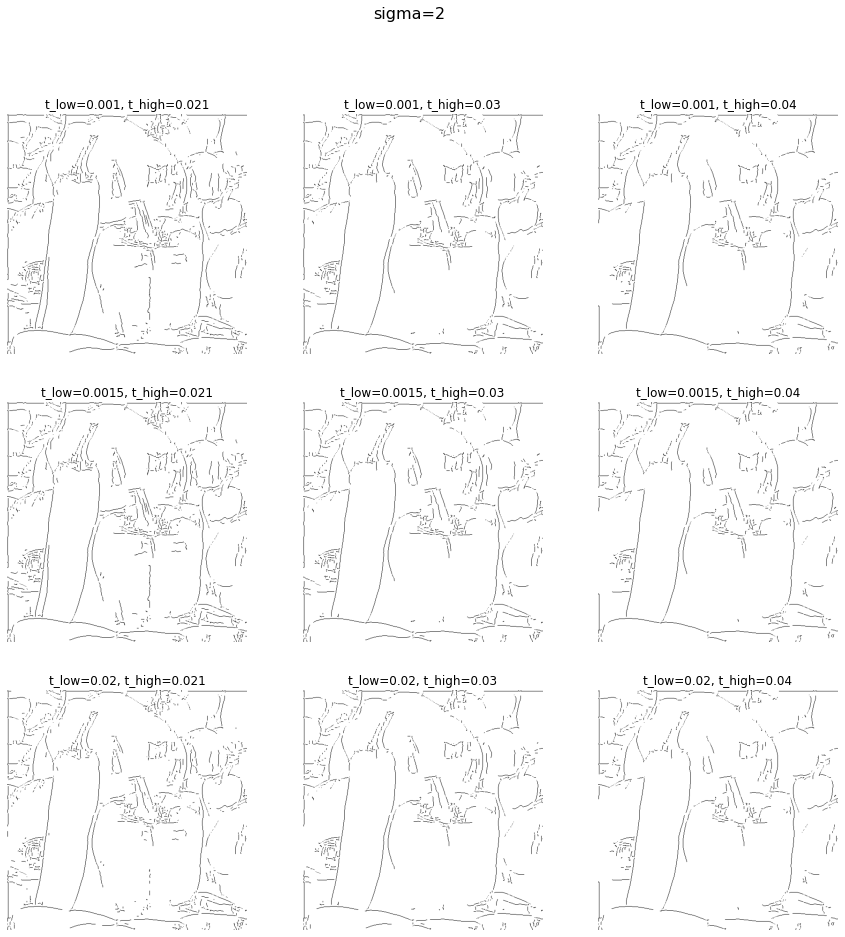

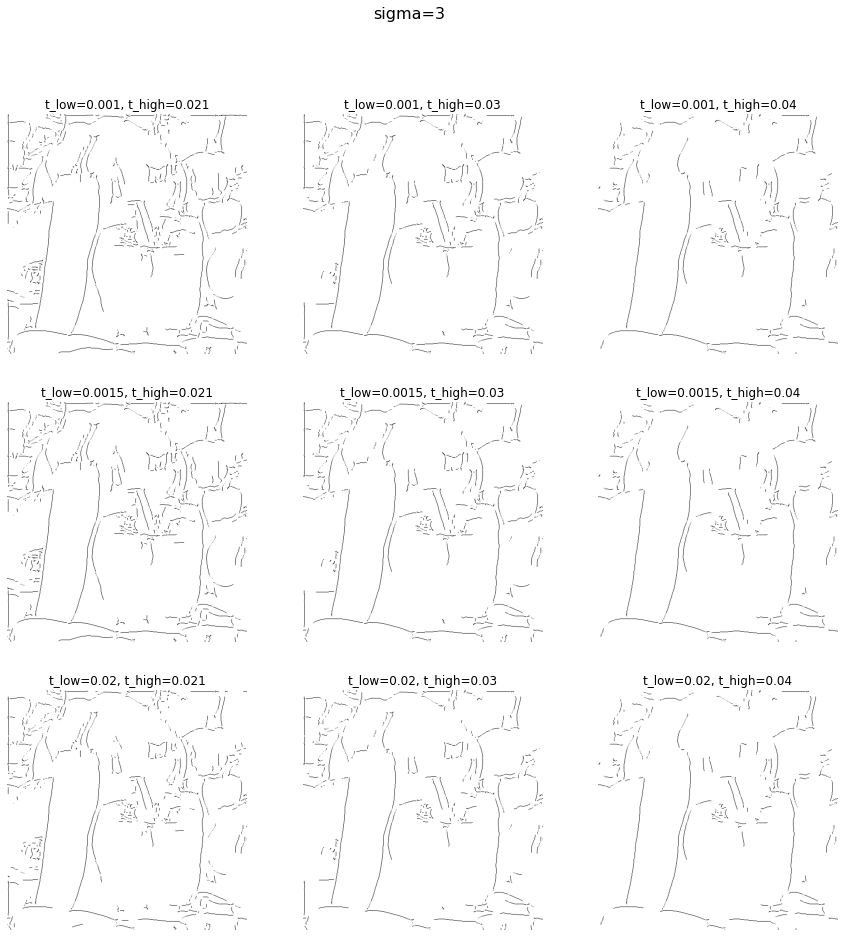

In [46]:
sigma_values = [1, 2, 3]
t_low_values = [0.001, 0.0015, 0.02]
t_high_values = [0.021, 0.03, 0.04]

test_canny_edges(I, sigma_values, t_low_values, t_high_values)

Increasing sigma reduces the amount of noise that appears in the image, but at the same time, it makes the edges rounder, less detailed, with a poor localization.

Increasing t_high also reduces noise, but it has to be balanced in order to not remove pixels that are actual edges

Increasing t_low will result in fewer weak edges being kept, while a lower lower threshold will result in more weak edges being kept. A balance must be found between detailing strong edges and potentially including noise.